In [189]:
import codecs
from gensim import corpora, models, similarities
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import numpy as np

In [190]:
def get_train(filename):
    train=[]
    fp=codecs.open(filename, 'r', encoding='utf-8')
    for line in fp:
        line = line.split()
        train.append(line)
    return train

In [191]:

#此处更改文件,下面几处相同,只用一次改1.txt,2.txt...即可，dirname可不变
train=get_train("output/2.txt")
dictionary = corpora.Dictionary(train) 
corpus = [dictionary.doc2bow(text) for text in train]  
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [192]:
lda = models.LdaModel(corpus_tfidf, num_topics=3, id2word=dictionary, alpha='auto', eta='auto', minimum_probability=0.001)

In [193]:
total_topics=3
numbers=10
#此处更改文件
with open(r'WordlistOutput/2.txt', 'w', encoding='utf-8') as f1:
    for topic_id in range(total_topics):
        print('Topic', topic_id)
        # print(lda.get_topic_terms(topicid=topic_id))  
        print(lda.show_topic(topicid=topic_id))
        word_list = lda.show_topic(topicid=topic_id)
        for i in range(numbers):
            f1.write(word_list[i][0]+' ')
        f1.write('\n')


Topic 0
[('报告', 0.0031792517), ('技术', 0.0018683618), ('汽车', 0.0017704152), ('发展', 0.0017000126), ('管理', 0.0015750887), ('健康', 0.0014674596), ('2019', 0.0013914865), ('新', 0.0013189914), ('数字', 0.0012405893), ('产品', 0.0011820885)]
Topic 1
[('GRI', 0.0028133038), ('披露', 0.002743154), ('2019', 0.0025272216), ('员工', 0.0024138833), ('汽车', 0.002300934), ('社会', 0.00215018), ('政策', 0.002100762), ('环境', 0.0019045736), ('管理', 0.0017827118), ('指标', 0.0016732854)]
Topic 2
[('绩效', 0.0022366229), ('尊重', 0.0021669648), ('成就', 0.0021008241), ('环境', 0.0019850687), ('融', 0.0019152974), ('汽车', 0.0018367801), ('指标', 0.0017771407), ('关键', 0.0016010723), ('影响', 0.001591633), ('发行人', 0.001417143)]


In [194]:
similarity=similarities.MatrixSimilarity(lda[corpus_tfidf])  

In [195]:
a = np.array(list(similarity))
result_index = a > 0.99000000

In [196]:
#此处更改文件
inputs = open(r'txt/2.txt', 'r', encoding='utf-8')
text_list = inputs.readlines()
# print(text_list)
count = len(text_list)
for line in range(count):
    nowline = count - 1 - line
    num = 0
    for item in result_index[nowline][nowline:count-1]:
        if item and num != 0:
            text_list[nowline] = text_list[nowline+num].replace('\n', '\\n') + text_list[nowline]
            text_list[nowline+num] = ''
        num += 1
# print(text_list)
#此处更改文件
with open(r'FinalOutput/2.txt', 'w', encoding='utf-8') as f:
    for text in text_list:
        f.write(text)

(3, 24)


/Users/chenguanjin/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 25919 (\N{CJK UNIFIED IDEOGRAPH-653F}) missing from current font.
  fig.canvas.draw()
/Users/chenguanjin/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 31574 (\N{CJK UNIFIED IDEOGRAPH-7B56}) missing from current font.
  fig.canvas.draw()
/Users/chenguanjin/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from current font.
  fig.canvas.draw()
/Users/chenguanjin/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from current font.
  fig.canvas.draw()
/Users/chenguanjin/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 26415 (\N{CJK UNIFIED IDEOGRAPH-672F}) missing from current font.
  fig.canvas.draw()
/Users/chenguanjin/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: U

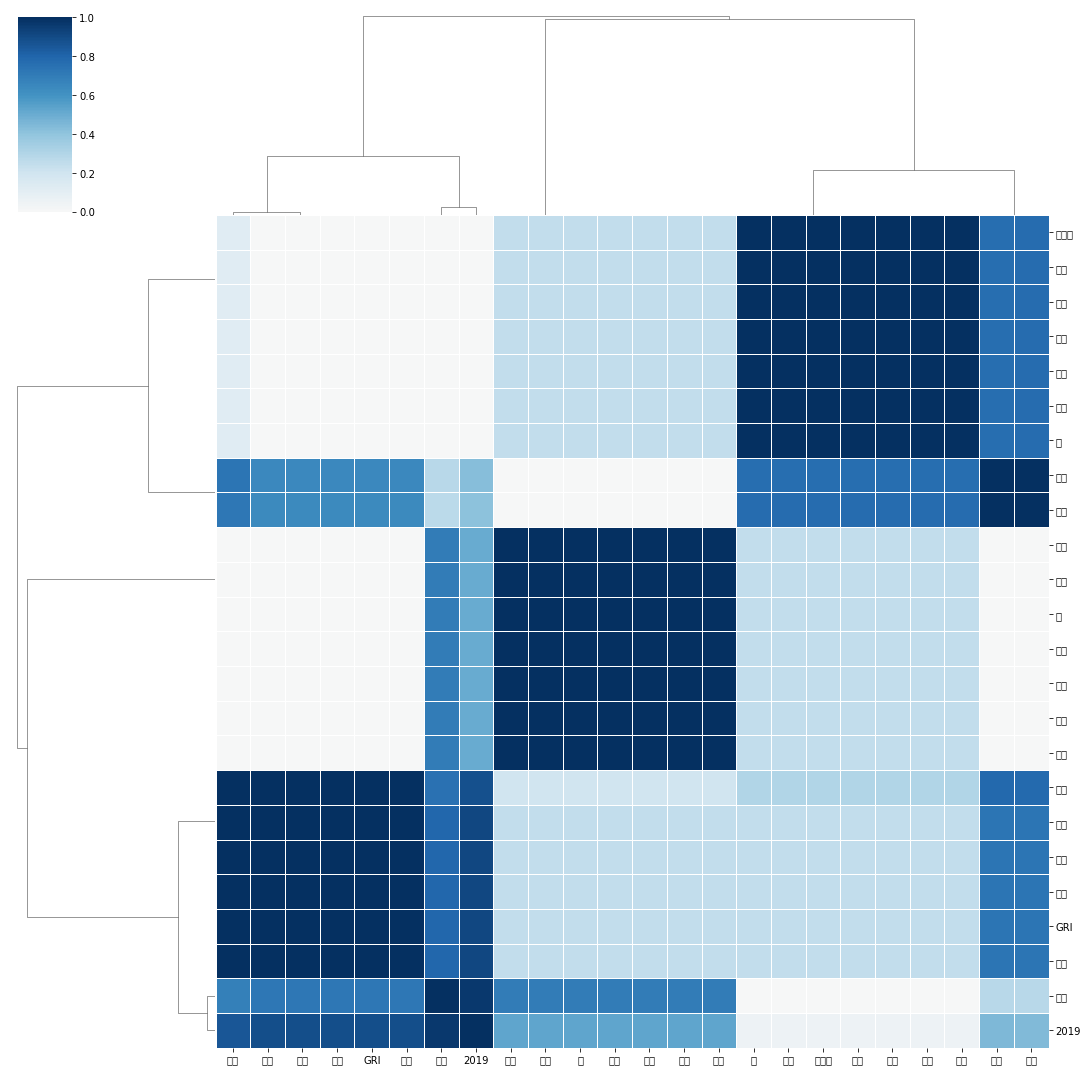

In [197]:
import seaborn as sns
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data_lda = {i: OrderedDict(lda.show_topic(i,10)) for i in range(total_topics)}
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(15, 15))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()